In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import time
import gc
import sys
import os

In [ ]:
df = pd.read_csv("/content/covid_19_indonesia_time_series_all.csv")
df.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)). transpose()

,count,mean,std,min,25%,50%,75%,max
New Cases,21759.00000,391.29358,2074.55104,0.00000,7.00000,41.00000,151.00000,56757.00000
New Deaths,21759.00000,13.22041,76.48262,0.00000,0.00000,1.00000,5.00000,2069.00000
New Recovered,21759.00000,377.31100,1999.06256,0.00000,4.00000,31.00000,143.00000,48832.00000
New Active Cases,21759.00000,0.76217,937.21351,-25725.00000,-16.00000,0.00000,27.00000,36726.00000
Total Cases,21759.00000,85259.97082,368513.28585,1.00000,1822.50000,10780.00000,36464.50000,4257243.00000
Total Deaths,21759.00000,2648.28935,11776.01107,0.00000,50.00000,283.00000,1050.00000,143858.00000
Total Recovered,21759.00000,76712.60246,340395.71089,0.00000,1038.50000,8745.00000,32932.50000,4105680.00000
Total Active Cases,21759.00000,5899.07900,27518.10243,-2306.00000,182.00000,919.00000,2607.50000,574135.00000
City or Regency,0.00000,nan,nan,nan,nan,nan,nan,nan
Total Regencies,21759.00000,24.16026,68.70827,1.00000,7.00000,11.00000,18.00000,416.00000


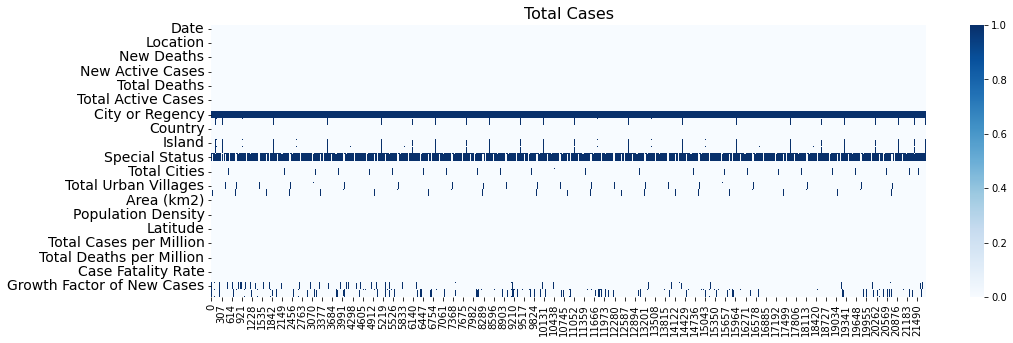

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Total Cases', fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
uni_data = df['Total Recovered']
uni_data.index = df['Date']

uni_data.head()

Date
3/1/2020    41
3/2/2020    41
3/2/2020     0
3/2/2020     3
3/3/2020    41
Name: Total Recovered, dtype: int64

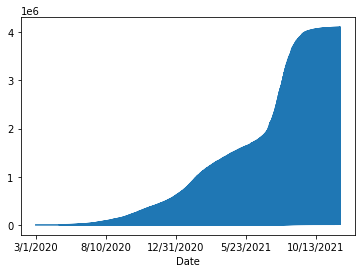

In [ ]:
uni_data.plot(subplots=True)
plt.show()
uni_data = uni_data.values

In [ ]:
features_considered = ['New Cases', 'Total Recovered', 'Location']

In [ ]:
features = df[features_considered]
features.index = df['Date']
features.head()

,New Cases,Total Recovered,Location
Date,,,
3/1/2020,2,41,DKI Jakarta
3/2/2020,2,41,DKI Jakarta
3/2/2020,2,0,Indonesia
3/2/2020,1,3,Riau
3/3/2020,2,41,DKI Jakarta


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56a2f493d0>,
      dtype=object)

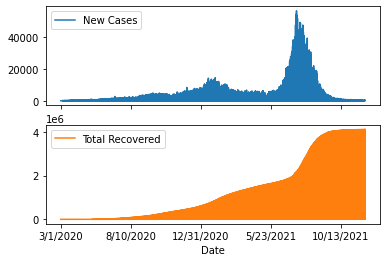

In [ ]:
features.plot(subplots=True)